In [1]:
print("--- Environment ---")
# GNU Octave, version 6.2.0

import sys, pkg_resources
print("Python: " + sys.version)

for package in pkg_resources.working_set:
    print(package.key.ljust(20), package.version)

--- Environment ---
Python: 3.8.8 (default, Feb 19 2021, 16:53:21) [GCC]
tornado              6.1
tensorflow           2.4.1
scipy                1.6.2
pyzmq                22.0.3
protobuf             3.15.8
pillow               8.2.0
numpy                1.19.5
matplotlib           3.4.1
kiwisolver           1.3.1
h5py                 2.10.0
grpcio               1.32.0
wrapt                1.12.1
wheel                0.36.2
werkzeug             1.0.1
wcwidth              0.2.5
urllib3              1.26.4
typing-extensions    3.7.4.3
traitlets            5.0.5
termcolor            1.1.0
tensorflow-estimator 2.4.0
tensorboard          2.5.0
tensorboard-plugin-wit 1.8.0
tensorboard-data-server 0.6.0
six                  1.15.0
setuptools           56.0.0
rsa                  4.7.2
requests             2.25.1
requests-oauthlib    1.3.0
python-dateutil      2.8.1
pyparsing            2.4.7
pygments             2.8.1
pyasn1               0.4.8
pyasn1-modules       0.2.8
ptyprocess          

In [3]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import numpy as np

In [22]:

# mnist = tf.keras.datasets.mnist
mnist = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [23]:
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), tf.keras.layers.Dense(512, activation=tf.nn.relu),tf.keras.layers.Dropout(0.5), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20)
result = model.evaluate(x_test, y_test)

print(result)

Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 2.2308 - accuracy: 0.1892
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0272 - accuracy: 0.2337
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0050 - accuracy: 0.2432
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9863 - accuracy: 0.2525
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9822 - accuracy: 0.2576
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9671 - accuracy: 0.2621
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9634 - accuracy: 0.2627
Epoch 8/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9643 - accuracy: 0.2625
Epoch 9/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9476 - accuracy: 0.2701
Epoch 10/20
1563/1563 [==============================] - 10s 6ms/step - l

KeyboardInterrupt: 

In [31]:
num_epoch = range(1, 40, 5)
results_ac = []
results_loss = []

for epochs in num_epoch:
    model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), tf.keras.layers.Dense(512, activation=tf.nn.relu),tf.keras.layers.Dropout(0.5), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs= epochs)
    result = model.evaluate(x_test, y_test)
    results_ac.append(result[1])
    results_loss.append(result[0])

313/313 [==============================] - 1s 2ms/step - loss: 1.9319 - accuracy: 0.2739
Epoch 1/6
1563/1563 [==============================] - 10s 7ms/step - loss: 2.2374 - accuracy: 0.1837
Epoch 2/6
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0362 - accuracy: 0.2277
Epoch 3/6
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0068 - accuracy: 0.2411
Epoch 4/6
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9994 - accuracy: 0.2461
Epoch 5/6
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9860 - accuracy: 0.2518
Epoch 6/6
313/313 [==============================] - 1s 2ms/step - loss: 1.8498 - accuracy: 0.3377
Epoch 1/11
1563/1563 [==============================] - 10s 6ms/step - loss: 2.1889 - accuracy: 0.1991
Epoch 2/11
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0205 - accuracy: 0.2486
Epoch 3/11
1563/1563 [==============================] - 10s 7ms/step - loss: 1.9825 - accuracy: 

KeyboardInterrupt: 

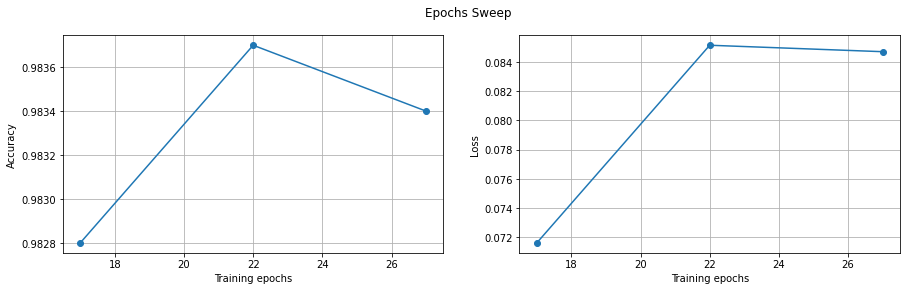

In [25]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.suptitle("Epochs Sweep")
axs[0].plot(num_epoch, results_ac, 'o-')
# axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Training epochs")
axs[0].grid()

axs[1].plot(num_epoch, results_loss, 'o-')
# axs[1].set_title("")
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Training epochs")
axs[1].grid()

# best_c_index = np.where(hit_rates_validation == np.amax(hit_rates_validation))[0][0]

# best_c = c_values[best_c_index]

# print("Best c value: {} \nPerformance of this vaule: {}".format(best_c, hit_rates_validation[best_c_index]))


In [27]:
num_neurons = range(500, 4000, 1000)
results_ac = []
results_loss = []

    # model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), tf.keras.layers.Dense(512, activation=tf.nn.relu),tf.keras.layers.Dropout(0.5), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

for neurons in num_neurons:    
    model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), tf.keras.layers.Dense(neurons, activation=tf.nn.relu),tf.keras.layers.Dropout(0.5), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs= 20)
    result = model.evaluate(x_test, y_test)
    results_ac.append(result[1])
    results_loss.append(result[0])

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4365 - accuracy: 0.8673
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1467 - accuracy: 0.9563
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1138 - accuracy: 0.9640
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0939 - accuracy: 0.9698
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0764 - accuracy: 0.9761
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721 - accuracy: 0.9771
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.9784
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0627 - accuracy: 0.9797
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0518 - accuracy: 0.9821
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.054

KeyboardInterrupt: 

In [31]:
num_neurons = range(500, 4000, 500)

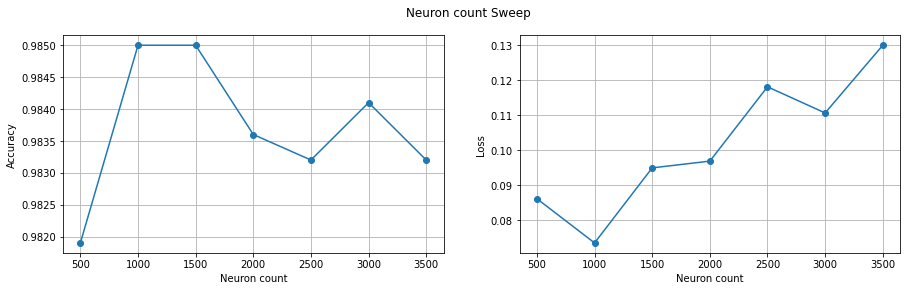

In [33]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.suptitle("Neuron count Sweep")
axs[0].plot(num_neurons, results_ac, 'o-')
# axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Neuron count")
axs[0].grid()

axs[1].plot(num_neurons, results_loss, 'o-')
# axs[1].set_title("")
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Neuron count")
axs[1].grid()

In [34]:
dropouts = [0.1, 0.3, 0.5, 0.7, 0.9]

for dropout in dropouts:    
    model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), tf.keras.layers.Dense(1000, activation=tf.nn.relu),tf.keras.layers.Dropout(dropout), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs= 20)
    result = model.evaluate(x_test, y_test)
    results_ac.append(result[1])
    results_loss.append(result[0])

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3155 - accuracy: 0.9052
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0822 - accuracy: 0.9749
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0511 - accuracy: 0.9832
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0364 - accuracy: 0.9878
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0314 - accuracy: 0.9892
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0208 - accuracy: 0.9931
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0200 - accuracy: 0.9932
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0196 - accuracy: 0.9934
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.014

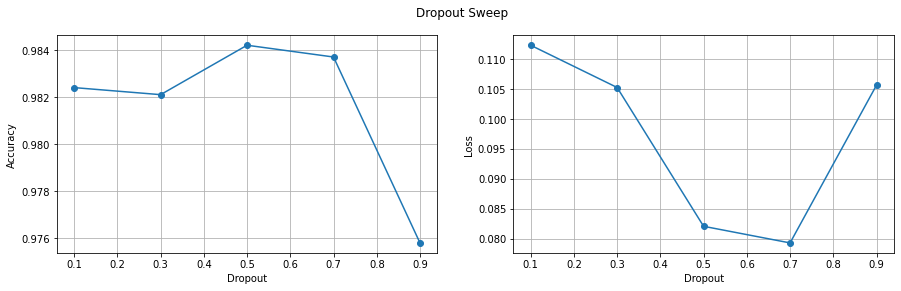

In [36]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.suptitle("Dropout Sweep")
axs[0].plot(dropouts, results_ac[-5:], 'o-')
# axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Dropout")
axs[0].grid()

axs[1].plot(dropouts, results_loss[-5:], 'o-')
# axs[1].set_title("")
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Dropout")
axs[1].grid()

In [37]:
activations = [tf.nn.relu, tf.nn.leaky_relu, tf.nn.sigmoid]
results_ac = []
results_loss =[]

for activation in activations:    
    model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), tf.keras.layers.Dense(1000, activation=activation),tf.keras.layers.Dropout(0.6), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs= 20)
    result = model.evaluate(x_test, y_test)
    results_ac.append(result[1])
    results_loss.append(result[0])

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4214 - accuracy: 0.8706
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1497 - accuracy: 0.9560
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1193 - accuracy: 0.9636
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1043 - accuracy: 0.9674
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0916 - accuracy: 0.9712
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0895 - accuracy: 0.9716
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0782 - accuracy: 0.9743
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0752 - accuracy: 0.9769
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0713 - accuracy: 0.9778
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.065

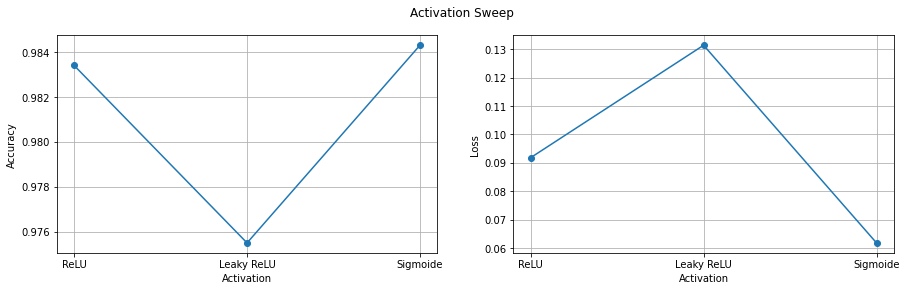

In [40]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.suptitle("Activation Sweep")
axs[0].plot(["ReLU", "Leaky ReLU", "Sigmoide"], results_ac[-5:], 'o-')
# axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Activation")
axs[0].grid()

axs[1].plot(["ReLU", "Leaky ReLU", "Sigmoide"], results_loss[-5:], 'o-')
# axs[1].set_title("")
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Activation")
axs[1].grid()

In [4]:
# activations = [tf.nn.relu, tf.nn.leaky_relu, tf.nn.sigmoid]
results_ac = []
results_loss =[]

In [6]:
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), tf.keras.layers.Dense(1000, activation=tf.nn.sigmoid), tf.keras.layers.Dropout(0.6), tf.keras.layers.Dense(300, activation=tf.nn.sigmoid), tf.keras.layers.Dropout(0.6), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs= 20)
result = model.evaluate(x_test, y_test)
results_ac.append(result[1])
results_loss.append(result[0])

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8921 - accuracy: 0.7081
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2497 - accuracy: 0.9239
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1805 - accuracy: 0.9452
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1479 - accuracy: 0.9564
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1204 - accuracy: 0.9627
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1098 - accuracy: 0.9666
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0922 - accuracy: 0.9719
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0887 - accuracy: 0.9735
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0804 - accuracy: 0.9753
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - l

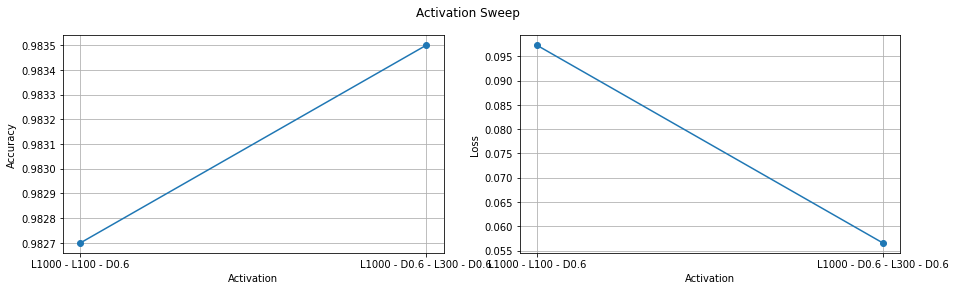

In [7]:
labels = ["L1000 - L100 - D0.6", "L1000 - D0.6 - L300 - D0.6"]

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.suptitle("Activation Sweep")
axs[0].plot(labels, results_ac[-5:], 'o-')
# axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Activation")
axs[0].grid()

axs[1].plot(labels, results_loss[-5:], 'o-')
# axs[1].set_title("")
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Activation")
axs[1].grid()

In [30]:
results_ac = []
results_loss = []

for i in range(10):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    result = model.evaluate(x_test, y_test)
    results_ac.append(result[1])
    results_loss.append(result[0])


Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.2147 - accuracy: 0.1940
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0117 - accuracy: 0.2425
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9988 - accuracy: 0.2532
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9883 - accuracy: 0.2526
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.8465 - accuracy: 0.3224
Epoch 1/5
1563/1563 [==============================] - 9s 6ms/step - loss: 2.2214 - accuracy: 0.1901
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0367 - accuracy: 0.2326
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0072 - accuracy: 0.2467
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9955 - accuracy: 0.2548
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.8825 - accura

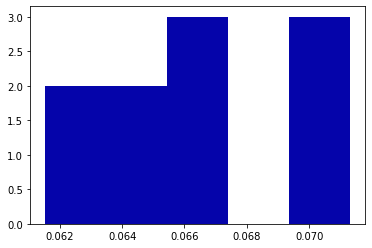

In [19]:
# n, bins, patches = plt.hist(x=results_ac, bins='auto', color='#0504aa')
n, bins, patches = plt.hist(x=results_loss, bins='auto', color='#0504aa')

In [21]:
results_ac_2 = []
results_loss_2 = []

for i in range(10):
    model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), tf.keras.layers.Dense(1000, activation=tf.nn.sigmoid),tf.keras.layers.Dropout(0.6), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs= 20)
    result = model.evaluate(x_test, y_test)
    results_ac_2.append(result[1])
    results_loss_2.append(result[0])

 loss: 0.0431 - accuracy: 0.9865
Epoch 15/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0414 - accuracy: 0.9863
Epoch 16/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0357 - accuracy: 0.9883
Epoch 17/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0344 - accuracy: 0.9886
Epoch 18/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0316 - accuracy: 0.9892
Epoch 19/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0319 - accuracy: 0.9897
Epoch 20/20
313/313 [==============================] - 1s 1ms/step - loss: 0.0589 - accuracy: 0.9841
Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6405 - accuracy: 0.7975
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2399 - accuracy: 0.9285
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1656 - accuracy: 0.9501
Epoch 4/20
1875/1875 [=======================

{'whiskers': [<matplotlib.lines.Line2D at 0x7f53706b9e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5351103e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f53706b9250>,
 'medians': [<matplotlib.lines.Line2D at 0x7f539477dd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f53f87bcca0>,
 'means': []}

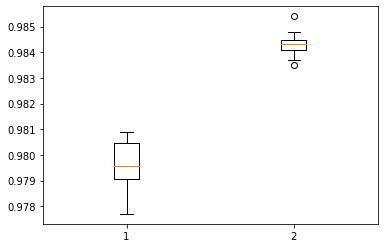

In [24]:
plt.boxplot([results_ac, results_ac_2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f537037e1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f537037d070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f537037ea00>,
 'medians': [<matplotlib.lines.Line2D at 0x7f537037d9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f537037deb0>,
 'means': []}

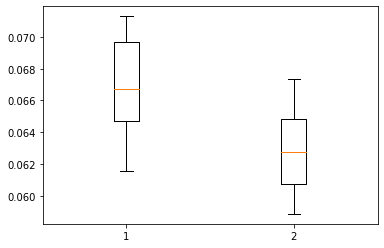

In [25]:
plt.boxplot([results_loss, results_loss_2])

Text(0, 0.5, 'Loss')

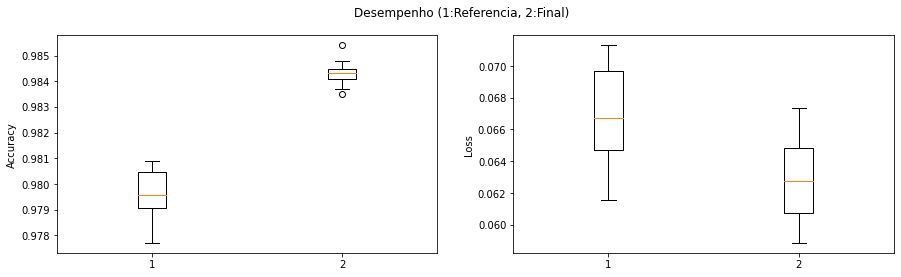

In [28]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.suptitle("Desempenho (1:Referencia, 2:Final)")
axs[0].boxplot([results_ac, results_ac_2])
# # axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Accuracy")
# axs[0].set_xlabel("Activation")
# axs[0].grid()

axs[1].boxplot([results_loss, results_loss_2])
# # axs[1].set_title("")
axs[1].set_ylabel("Loss")
# axs[1].set_xlabel("Activation")
# axs[1].grid()

In [6]:
    nb_epoch = 20
    batch_size = 128
    nb_classes = 10

    cifar10 = tf.keras.datasets.cifar10
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
    Y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

In [29]:


    # MLP 
    # model = tf.keras.models.Sequential()
    # model.add(tf.keras.layers.Flatten())
    # model.add(tf.keras.layers.Activation('sigmoid'))
    # model.add(tf.keras.layers.Dropout(0.2))
    # model.add(tf.keras.layers.Dense(512))
    # model.add(tf.keras.layers.Activation('sigmoid'))
    # model.add(tf.keras.layers.Dropout(0.2))
    # model.add(tf.keras.layers.Dense(512))
    # model.add(tf.keras.layers.Activation('sigmoid'))
    # model.add(tf.keras.layers.Dropout(0.2))
    # model.add(tf.keras.layers.Dense(10))
    # model.add(tf.keras.layers.Activation('softmax'))


    model = tf.keras.models.Sequential(
        [tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(2048, activation=tf.nn.sigmoid),
        tf.keras.layers.Dropout(0.2), 
        tf.keras.layers.Dense(1024, activation=tf.nn.sigmoid),
        tf.keras.layers.Dropout(0.2), 
        tf.keras.layers.Dense(512, activation=tf.nn.sigmoid),
        tf.keras.layers.Dropout(0.2), 
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)]
        )
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # model.fit(x_train, y_train, epochs= 20)

    # model.compile(loss='categorical_crossentropy',
    #               optimizer='adam',
    #               metrics=['accuracy'])
    # model.summary()

    # training
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

    # save_history(history, 'history.txt')

    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)

Epoch 1/20
391/391 [==============================] - 39s 100ms/step - loss: 2.1569 - accuracy: 0.1999 - val_loss: 1.8747 - val_accuracy: 0.3119
Epoch 2/20
391/391 [==============================] - 35s 89ms/step - loss: 1.8130 - accuracy: 0.3385 - val_loss: 1.7490 - val_accuracy: 0.3577
Epoch 3/20
391/391 [==============================] - 20s 50ms/step - loss: 1.7214 - accuracy: 0.3765 - val_loss: 1.6493 - val_accuracy: 0.4008
Epoch 4/20
391/391 [==============================] - 19s 47ms/step - loss: 1.6919 - accuracy: 0.3871 - val_loss: 1.6004 - val_accuracy: 0.4285
Epoch 5/20
391/391 [==============================] - 41s 105ms/step - loss: 1.6614 - accuracy: 0.4032 - val_loss: 1.5679 - val_accuracy: 0.4325
Epoch 6/20
391/391 [==============================] - 18s 47ms/step - loss: 1.6150 - accuracy: 0.4185 - val_loss: 1.5740 - val_accuracy: 0.4360
Epoch 7/20
391/391 [==============================] - 18s 47ms/step - loss: 1.6006 - accuracy: 0.4227 - val_loss: 1.5704 - val_accurac

In [7]:
result = [0.6901, 0.6801, 0.687]
error = [0.9036, 0.905, 0.89]


Text(0, 0.5, 'Loss')

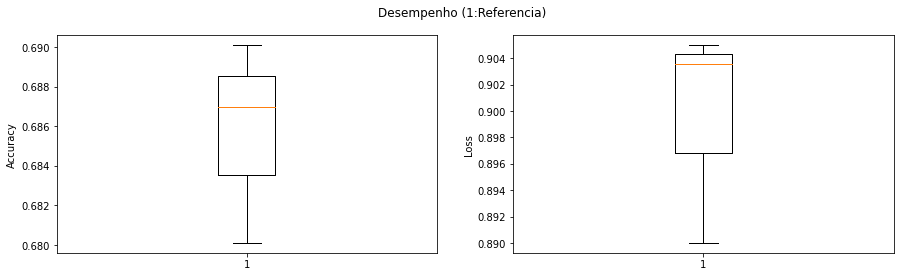

In [9]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.suptitle("Desempenho (1:Referencia)")
axs[0].boxplot([result])
# # axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Accuracy")
# axs[0].set_xlabel("Activation")
# axs[0].grid()

axs[1].boxplot([error])
# # axs[1].set_title("")
axs[1].set_ylabel("Loss")
# axs[1].set_xlabel("Activation")
# axs[1].grid()